## <center> Akhilesh Bhaugeerutty & Magib Seck <b/>
### <center> Projet - Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction 
Le but du projet sera d'analyser les données du tableau 'crime', qui est un extrait des crimes s'étant produits à Sacramento en janvier 2006. 

Nous importons donc les données, avant d'ensuite étudier les variables en profondeur.

In [2]:
crime = pd.read_csv("C:/Users/Akhilesh/Desktop/Akhil/MIE/MASTER/Semestre 3/Python Exercises/Projet/crime.csv", )
crime.head()

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/06 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/06 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/06 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,1/1/06 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613


Il y a donc 7584 observations de 9 variables, une de date, et le reste qualitatives/quantitatives.
Les 9 variables sont:
* La date et heure du crime
* Des données de location: adresse, district, grille, latitude et longitude
* La description du crime </br>

Regardons la classe de ces variables importées: 

In [3]:
crime.dtypes

cdatetime         object
address           object
district           int64
beat              object
grid               int64
crimedescr        object
ucr_ncic_code      int64
latitude         float64
longitude        float64
dtype: object

Les variables de type objet sont des variables qualitatives, (et la date), qui ont été codées comme des facteurs.
En regardant rapidement les données, on voit que les variables  quantitatives importantes seront latitude et longitude.
Etudions à présent celles-ci, pour à peu près visualiser où se déroulent ces crimes:

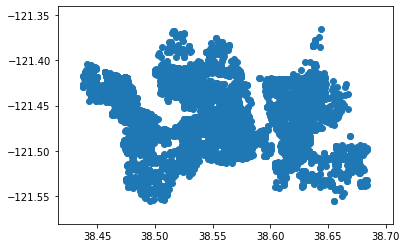

In [4]:
plt.scatter(crime['latitude'], crime['longitude'])

Pour visualiser sur une carte, les crimes se passent vers ces alentours: 

In [11]:
#from IPython.display import Image
#Image("C:/Users/Akhilesh/Desktop/Akhil/MIE/MASTER/Semestre 3/Python Exercises/Projet/Sacramento.png")

#### Agrégats et analyse: 

Nous allons par regarder la fréquence des crimes. Pour ceci, nous devons d'abord transformer la variable de date en datetime. 

In [5]:
crime['date'] = pd.to_datetime(crime['cdatetime'])
crime['day'] = crime['date'].dt.day
crime['hour'] = crime['date'].dt.hour
crime['minute'] = crime['date'].dt.minute

Répartition des crimes pendant le mois: 

(array([651., 758., 685., 820., 693., 776., 753., 722., 782., 944.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

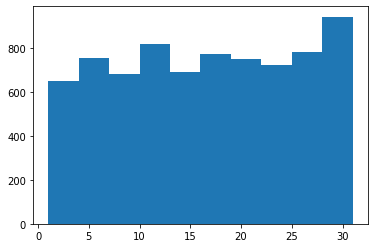

In [6]:
plt.hist(crime['date'].dt.day)

Les crimes sont restés assez constants durant le mois, avec un pic à la fin. Plus intéressant encore, analysons la répartition des crimes pendant la journée: 

(array([ 936.,  213.,  187.,  925.,  644.,  752., 1273.,  888.,  720.,
        1046.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

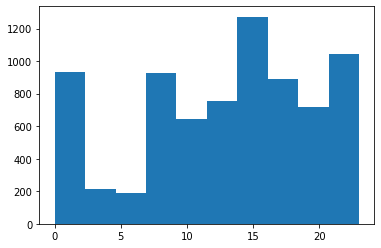

In [7]:
plt.hist(crime['hour'])

Il est étonnant de voir qu'il y a plus de crimes reportés vers 15h, que la nuit! 

Finalement, faisons un pivot table, qui va agréger la location (triée par district) des crimes, et leur jour de survenance. 

In [12]:
pvt = crime.pivot_table(index = ['district', 'beat'], columns= 'day',  aggfunc= 'count', margins=True, margins_name='Total')
pvt.dropna() #retirer les valeurs nulles données par le pivot

address                                                   \
day                       1      2      3      4      5      6      7      8   
district beat                                                                  
1        1A            16.0    6.0   12.0   10.0    7.0   14.0    8.0   11.0   
         1B            18.0    7.0   11.0   10.0   10.0   12.0   10.0    7.0   
         1C             6.0    8.0    6.0    9.0    9.0    6.0    8.0    3.0   
2        2A            24.0   10.0   21.0   16.0   21.0   12.0   14.0   14.0   
         2B            16.0   14.0   11.0   11.0   14.0   23.0   12.0   15.0   
         2C            18.0   13.0   23.0   14.0   14.0   13.0   18.0    8.0   
3        3A            13.0    8.0   18.0   12.0   13.0   10.0   11.0    7.0   
         3B            12.0    8.0   15.0   11.0    9.0    8.0   16.0    6.0   
         3C            15.0    5.0   11.0   13.0   15.0   19.0   12.0   14.0   
         3M            12.0   12.0   19.0   10.0    9.0   11.0    8.0    6.0   
4        4A             8.0    4.0   13.0    6.0    5.0    4.0    7.0    6.0   
         4B             3.0    4.0    9.0   39.0   13.0   15.0   16.0   12.0   
         4C            15.0    8.0   13.0    9.0   19.0   17.0   13.0    5.0   
5        5A             6.0    6.0   12.0   11.0   10.0   11.0   11.0    7.0   
         5B            16.0    6.0   17.0   16.0   15.0    8.0   12.0   11.0   
         5C            13.0    7.0   11.0   18.0   11.0   10.0   15.0   13.0   
6        6A             9.0    6.0   12.0   15.0   29.0   17.0   11.0   12.0   
         6B            19.0    6.0   12.0   12.0   18.0    7.0   15.0   12.0   
         6C            11.0    7.0    9.0   13.0   25.0   15.0   23.0   13.0   
Total                 250.0  145.0  256.0  257.0  268.0  233.0  242.0  182.0   

                                   ... ucr_ncic_code                       \
day                      9     10  ...            23     24     25     26   
district beat                      ...                                      
1        1A           11.0   12.0  ...           5.0   16.0    5.0   11.0   
         1B           11.0    9.0  ...          11.0   14.0    5.0   14.0   
         1C            8.0   10.0  ...           5.0    8.0    5.0    6.0   
2        2A           12.0   15.0  ...          12.0   18.0   12.0   19.0   
         2B           24.0   29.0  ...          12.0   16.0   12.0   27.0   
         2C           14.0   15.0  ...          18.0   16.0   18.0   18.0   
3        3A           10.0   11.0  ...          13.0   10.0   15.0    8.0   
         3B            8.0   12.0  ...          12.0   16.0   15.0   12.0   
         3C           22.0   13.0  ...          13.0   22.0   20.0   13.0   
         3M           10.0    9.0  ...          19.0   10.0   15.0    6.0   
4        4A           10.0    6.0  ...          15.0   12.0   11.0   16.0   
         4B            9.0    9.0  ...          10.0   28.0    6.0   10.0   
         4C           20.0   14.0  ...           9.0   14.0   14.0    7.0   
5        5A            8.0   13.0  ...          13.0   11.0   11.0   16.0   
         5B           16.0   10.0  ...           8.0    9.0    9.0   10.0   
         5C           15.0   11.0  ...          16.0   17.0   18.0   19.0   
6        6A           22.0   14.0  ...          13.0   11.0   37.0   15.0   
         6B           19.0   19.0  ...          19.0   13.0   12.0    9.0   
         6C           10.0   12.0  ...          15.0   15.0    9.0   16.0   
Total                261.0  244.0  ...         241.0  277.0  249.0  254.0   

                                                              
day                     27     28     29     30     31 Total  
district beat                                                 
1        1A           14.0   10.0    8.0    2.0    5.0   307  
         1B           11.0   10.0    9.0    6.0    5.0   307  
         1C           10.0   14.0   10.0    9.0    7.0   253  
2        2A           23.0   

On remarque que les districts sont différents concernant le nombre de crimes, et des différences sont aussi marquées dans un même district en fonction de la zone. 

Etudions à présent l'évolution du nombre de crime en fonction des districts: 

In [13]:
cr1 = crime[crime['district'] == 1].groupby(['day']).count()
cr2 = crime[crime['district'] == 2].groupby(['day']).count()
cr3 = crime[crime['district'] == 3].groupby(['day']).count()
cr4 = crime[crime['district'] == 4].groupby(['day']).count()
cr5 = crime[crime['district'] == 5].groupby(['day']).count()
# pour aggréger les crimes, on compte le nombre de données par jour et par district
# On aurait pu faire un pivot table encore, mais c'est plus simple ainsi, car les graphiques auraient été + compliqués
s1 = cr1.iloc[:,0]
s2 = cr2.iloc[:,0]
s3 = cr3.iloc[:,0]
s4 = cr4.iloc[:,0]
s5 = cr5.iloc[:,0]

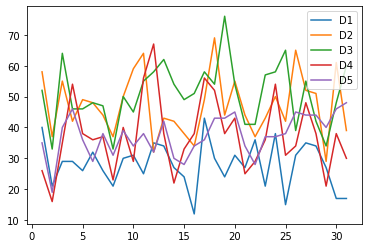

In [44]:
plt.plot(s1, label = "D1")
plt.plot(s2, label = "D2")
plt.plot(s3, label = "D3")
plt.plot(s4, label = "D4")
plt.plot(s5, label = "D5")
plt.legend()

On voit que bien que les tendances se ressemblent, les districts 2 & 3 sont plus à risque, contrairement au district 1, qui recense considérablement moins de crimes tout au long du mois. 